In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from geonamescache import GeonamesCache
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
import os

In [18]:
filename = 'forest_data.csv'
# os.getcwd returns path of current working directory wrt terminal path. So, open the terminal inside this repo
cwd = os.getcwd()
shapefile = cwd+'\\ne_10m_admin_0_countries\\ne_10m_admin_0_countries'
num_colors = 9
year = '2015'
cols = ['Country Name', 'Country Code', year]
title = 'Forest area as percentage of land area in {}'.format(year)
descripton = '''
Forest area is land under natural or planted stands of trees of at least 5 meters in situ, whether productive or not, and excludes tree stands in agricultural production systems (for example, in fruit plantations
and agroforestry systems) and trees in urban parks and gardens. Countries without data are shown in grey. Data: World Bank - worldbank.org Author: Ramiro Gomez - ramiro.org'''.strip()

In [14]:
gc = GeonamesCache()
iso3_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

In [15]:
df = pd.read_csv(filename, skiprows=4, usecols=cols)
df.set_index('Country Code', inplace=True)
df = df.ix[iso3_codes].dropna() # Filter out non-countries and missing values.

In [16]:
values = df[year]
cm = plt.get_cmap('Greens')
scheme= cm(1.*np.arange(num_colors)/num_colors)
bins = np.linspace(values.min(), values.max(), num_colors)
df['bin'] = np.digitize(values, bins) - 1
df.sort_values('bin', ascending=False).head(30)

,Country Name,2015,bin
Country Code,,,
SUR,Suriname,98.282051,8
GAB,Gabon,89.261458,7
FSM,"Micronesia, Fed. Sts.",91.814286,7
SYC,Seychelles,89.384615,7
PLW,Palau,87.608696,7
ASM,American Samoa,87.700000,7
SLB,Solomon Islands,78.063594,6
PNG,Papua New Guinea,74.104580,6
LAO,Lao PDR,81.288605,6


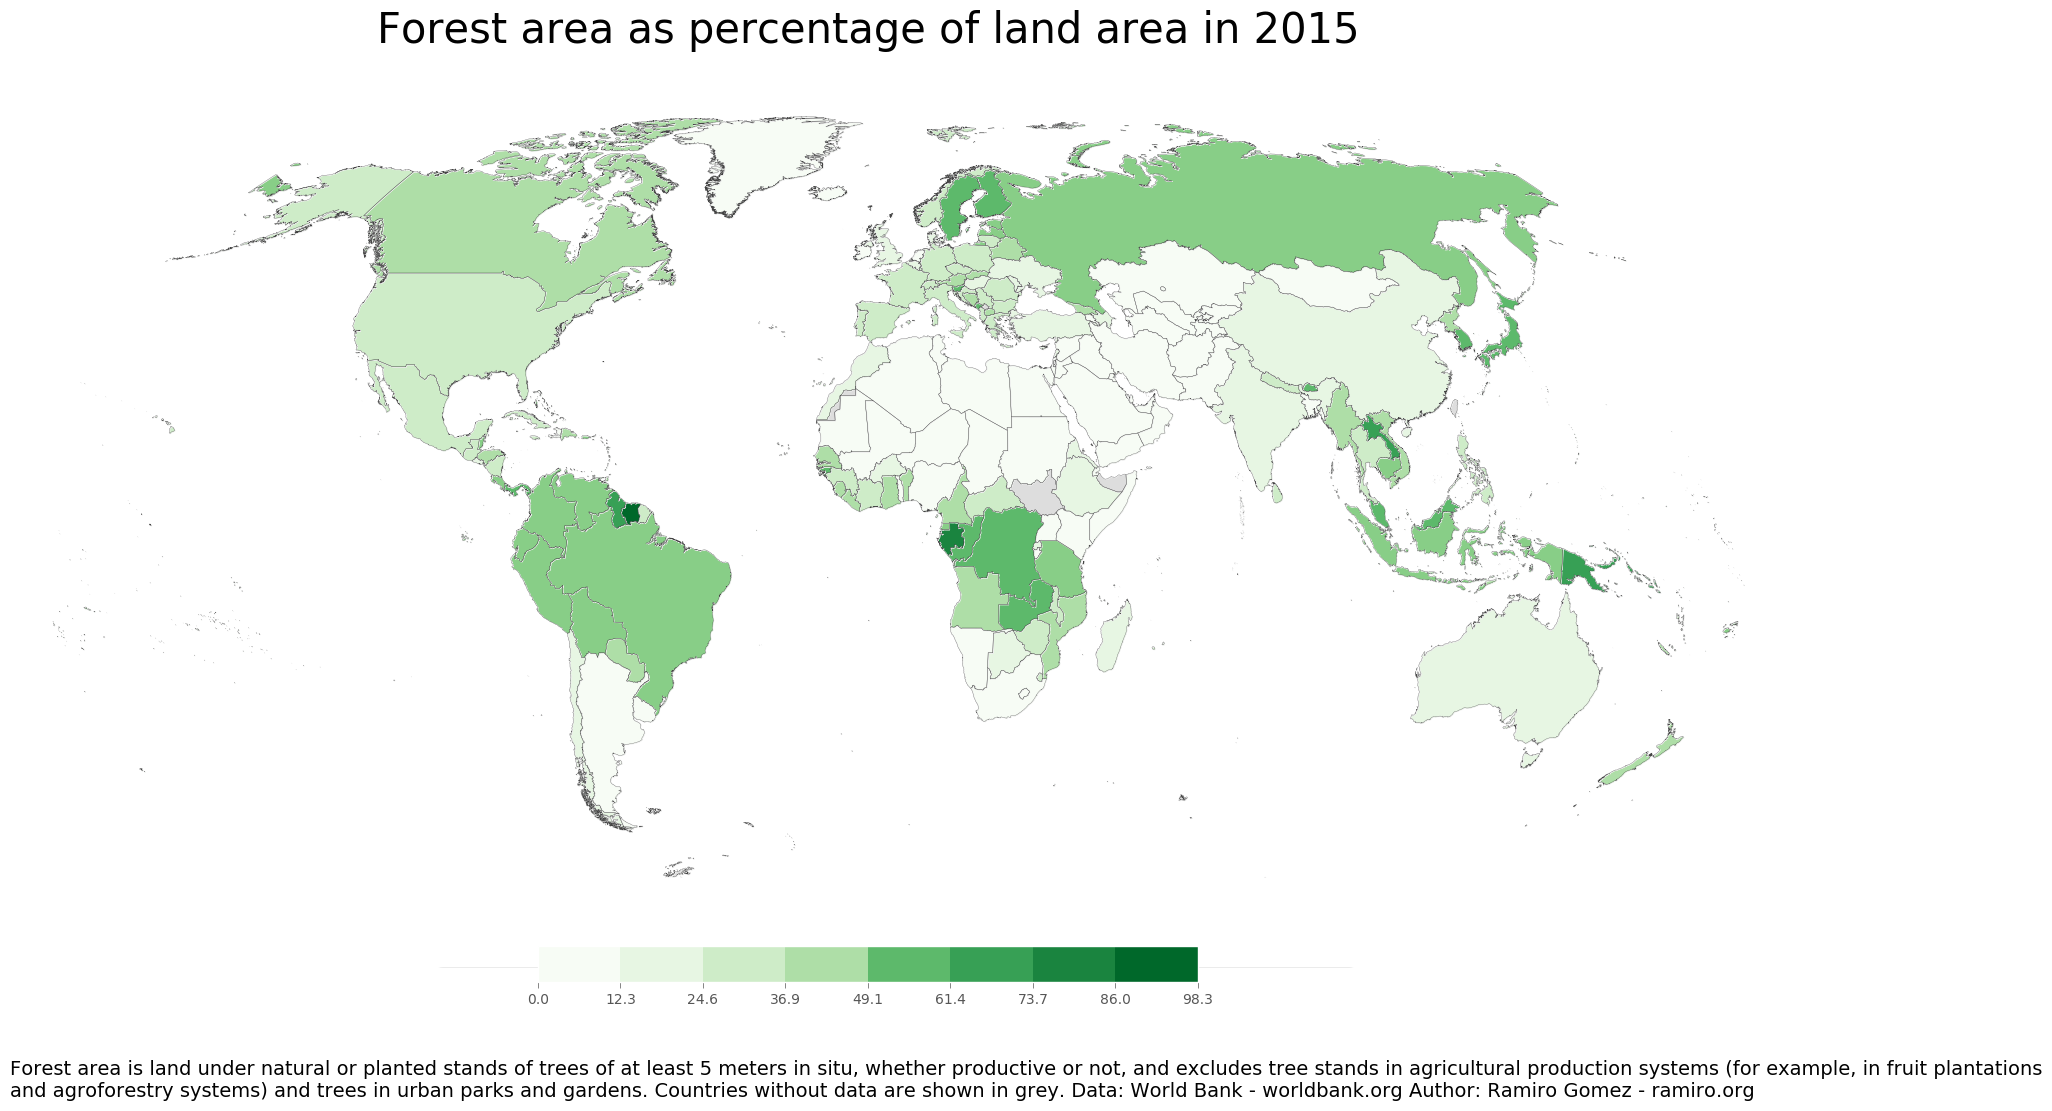

In [17]:
mpl.style.use('ggplot')
fig = plt.figure(figsize=(22, 12))

ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('Forest area as percentage of land area in {}'.format(year), fontsize=30, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')

m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADM0_A3']
    if iso3 not in df.index:
        color = '#dddddd'
    else:
#         print df.ix[iso3]
#         print scheme[df.ix[iso3]['bin']]
        color = scheme[df.ix[iso3]['bin']]

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)

# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

# Set the map footer.
plt.annotate(descripton, xy=(-.8, -3.2), size=14, xycoords='axes fraction')

plt.savefig("Forest Map Percentage", bbox_inches='tight', pad_inches=.2)